[Reference: theoretical ecology / A simple Metropolis-Hastings MCMC in R](https://theoreticalecology.wordpress.com/2010/09/17/metropolis-hastings-mcmc-in-r/)

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 5, 4

In [3]:
import numpy as np
import scipy as sp
import numpy.random as npr
import seaborn as sns
import matplotlib.pyplot as plt

# Create Data Set

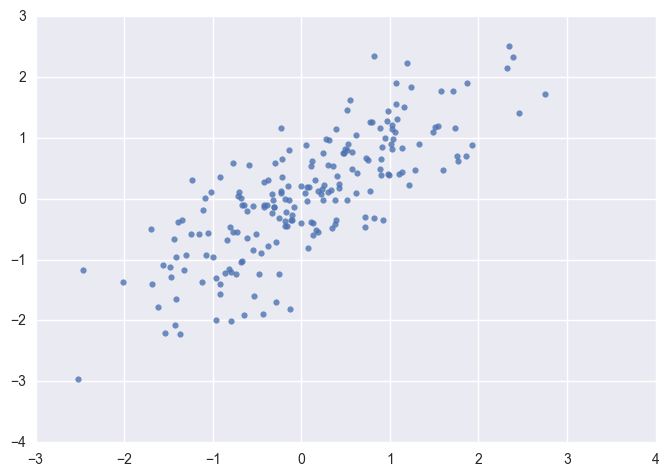

In [4]:
mean = 0 ; c=0.8
data = np.random.multivariate_normal(mean=[mean, mean], cov=[[1, c], [c, 1]], size=200)
sns.regplot(x=data[: , 0], y=data[: , 1], fit_reg=False)

# MCMC

mean = np.array([y1, y2]), cov = np.array([[c1, 0], [0, c2]])

In [8]:
num_sampling = 100000
chain = np.zeros((num_sampling, 1, 2))
chain[0][0][0] = npr.uniform(-3,3) # starting value for　the first dimension
chain[0][0][1] = npr.uniform(-3,3) # starting value for the second dimension

mu = np.array([data[:, 0].mean(), data[:, 1].mean()])
rho = np.array([np.corrcoef(data[:, 0], data[:, 1])[0,1], np.corrcoef(data[:, 0], data[:, 1])[0,1]])

for i in range(1, num_sampling-1):
    chain_previous = chain[i][:]
    chain_new = np.zeros((1, 1, 2))
    
    muCond = mu[0] + rho[0] * (chain_previous[0][1] - mu[1])
    varCond = np.sqrt( 1 - np.power(rho[0], 2))
    #print(muCond, varCond)

    chain_new[0][0][0] = npr.normal(muCond, varCond)
    
    muCond = mu[1] + rho[1] * (chain_new[0][0][0] - mu[0])
    varCond = np.sqrt( 1 - np.power(rho[1], 2))
    #print(muCond, varCond)

    chain_new[0][0][1] = npr.normal(muCond, varCond)
            
    chain[i+1] = chain_new[0][:]

In [9]:
np.corrcoef(data[:, 0], data[:, 1])

array([[ 1.        ,  0.78861822],
       [ 0.78861822,  1.        ]])

# Show Results

In [10]:
show_num = int(np.rint(num_sampling * 0.95))

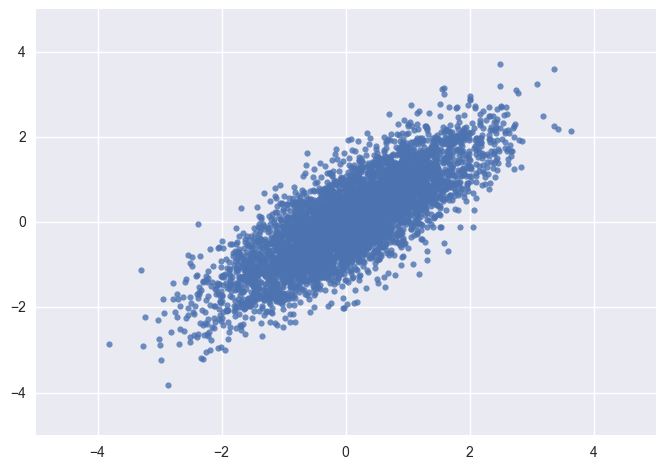

In [11]:
sns.regplot(x=chain[show_num: , 0, 0], y=chain[show_num: , 0, 1], fit_reg=False)

In [12]:
np.cov(chain[show_num: , 0, 0], chain[show_num: , 0, 1])

array([[ 1.02054775,  0.80871474],
       [ 0.80871474,  1.00932218]])

In [13]:
show_num = int(np.rint(num_sampling * 0.994))

In [14]:
show_num

99400

## mean1

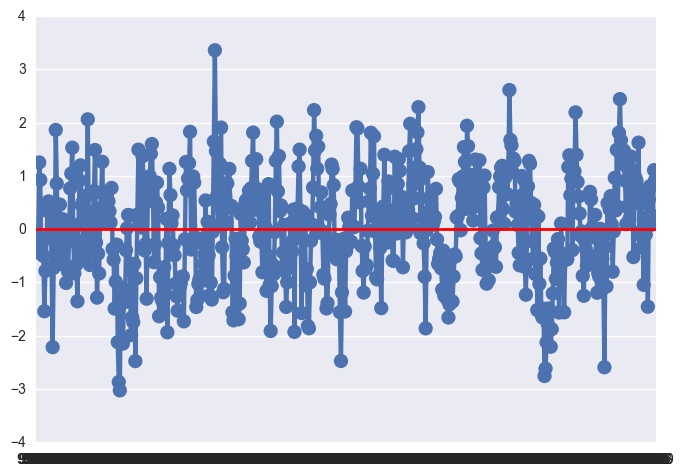

In [15]:
sns.pointplot(x=np.arange(show_num, num_sampling, 1), y=chain[show_num: , 0, 0])
plt.plot([0, num_sampling-show_num], [0, 0], linewidth=2, color='red')

In [16]:
chain[show_num: , 0, 0].mean()

-0.0020970076155252689

## mean2

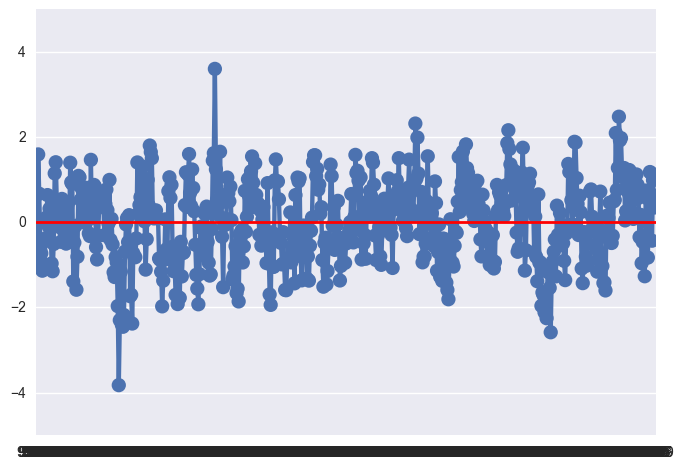

In [17]:
sns.pointplot(x=np.arange(show_num, num_sampling, 1), y=chain[show_num: , 0, 1])
plt.plot([0, num_sampling-show_num], [0, 0], linewidth=2, color='red')

In [18]:
chain[show_num: , 0, 1].mean()

-0.016097053440667045